# Optimazation of Agriculture production

In [1]:
#for Manipulation
import pandas as pd
import numpy as np

# for Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print('shape of the data' , data.shape)

shape of the data (2200, 8)


In [6]:
# lets check if there is any missing value in the data set
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# let check the crops in data set

data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
# lets check for the distribution

C:\Users\Swapnil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swapnil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swapnil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

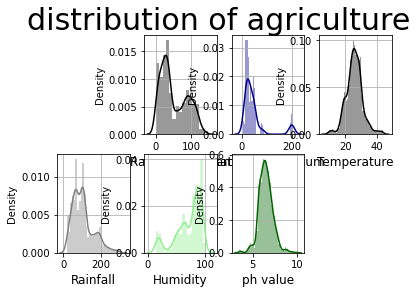

In [15]:

plt.subplot(2,4,2)
sns.distplot(data['N'] , color= 'black')
plt.xlabel('Ratio of nitrogen' , fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'] , color= 'darkblue')
plt.xlabel('Ratio of potassium' , fontsize = 12)
plt.grid()


plt.subplot(2,4,4)
sns.distplot(data['temperature'] , color= 'black')
plt.xlabel('Temperature' , fontsize = 12)
plt.grid()


plt.subplot(2,4,5)
sns.distplot(data['rainfall'] , color= 'grey')
plt.xlabel('Rainfall' , fontsize = 12)
plt.grid()


plt.subplot(2,4,6)
sns.distplot(data['humidity'] , color= 'lightgreen')
plt.xlabel('Humidity' , fontsize = 12)
plt.grid()


plt.subplot(2,4,7)
sns.distplot(data['ph'] , color= 'darkgreen')
plt.xlabel('ph value' , fontsize = 12)
plt.grid()

plt.suptitle('distribution of agriculture' , fontsize = 30)
plt.show()

In [16]:
# Lets findout which crop is good for which season

print('Summer Crops')
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print('-----------------------------------------------------------')

print('Winter Crops')
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print('-----------------------------------------------------------')

print('Rainy Crops')
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [18]:
# Now for further analysis we are going to use clustering analysis
# it is used to identify the data point of the same group and it saperate it from different group
# it is a part of unsupervised learning that means we do not require label

from sklearn.cluster import KMeans

# droping the label

x = data.drop(['label'] , axis = 1)

x = x.values

print(x.shape)

(2200, 7)


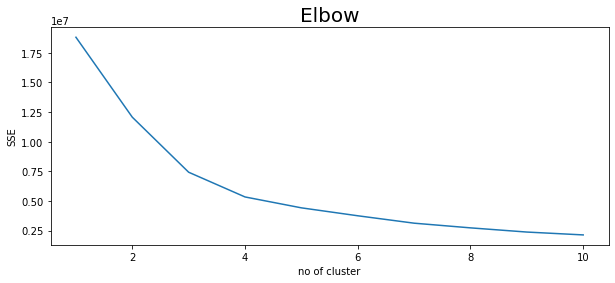

In [21]:
# let determine the no. of cluster within the data set

plt.rcParams['figure.figsize'] = (10 , 4)

SSE = []

for i in range (1 , 11):
    
    km = KMeans(n_clusters = i,init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0 )
    km.fit(x)
    SSE.append(km.inertia_)

#let plot the result 

plt.plot(range(1,11),SSE)
plt.title('Elbow' , fontsize = 20)
plt.xlabel('no of cluster')
plt.ylabel('SSE')
plt.show()

In [22]:
# lets apply kmeans algo. for clustering analysis
km = KMeans(n_clusters = i,init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0 )
y_means=km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means , a] , axis = 1)
z = z.rename(columns = {0 : 'cluster'})

print('Crops in 1st cluster' , z[z['cluster']==0]['label'].unique())
print('-------------------------------------------------------------------')
print('Crops in 2nd cluster' , z[z['cluster']==1]['label'].unique())
print('-------------------------------------------------------------------')
print('Crops in 3rd cluster' , z[z['cluster']==2]['label'].unique())
print('-------------------------------------------------------------------')
print('Crops in 4rth cluster' , z[z['cluster']==3]['label'].unique())
print('-------------------------------------------------------------------')
    


Crops in 1st cluster ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mango']
-------------------------------------------------------------------
Crops in 2nd cluster ['grapes' 'apple']
-------------------------------------------------------------------
Crops in 3rd cluster ['rice' 'papaya' 'jute' 'coffee']
-------------------------------------------------------------------
Crops in 4rth cluster ['watermelon' 'muskmelon' 'papaya']
-------------------------------------------------------------------


In [25]:
# lets split the data for predection 

y = data['label']
x = data.drop(['label'], axis = 1)
print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [27]:
# lets split the data in training and testing

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state  = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [29]:
#creating predecting model(logistic regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

C:\Users\Swapnil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9681818181818181